In [1]:
!pip install tensorflow==2.16.2
!pip install pydot graphviz

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

In [3]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super(CustomDenseLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)


In [4]:
from tensorflow.keras.layers import Softmax

model = Sequential([CustomDenseLayer(128),
                    CustomDenseLayer(10),
                    Softmax()])

model.compile(optimizer='adam', loss='categorical_crossentropy')

model.build((1000, 20))
print("\nModel summary after building:")
model.summary()


Model summary after building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import numpy as np 

x_train = np.random.random((1000, 20)) 
y_train = np.random.randint(10, size=(1000, 1)) 

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) 
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3041
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3011 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3007 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2985 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2953 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2946 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2961 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2945 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2926 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2887 


In [6]:
x_test = np.random.random((200, 20)) 
y_test = np.random.randint(10, size=(200, 1)) 

y_test = tf.keras.utils.to_categorical(y_test, num_classes=10) 

loss = model.evaluate(x_test, y_test) 
print(f'Test loss: {loss}') 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3114  
Test loss: 2.3102664947509766


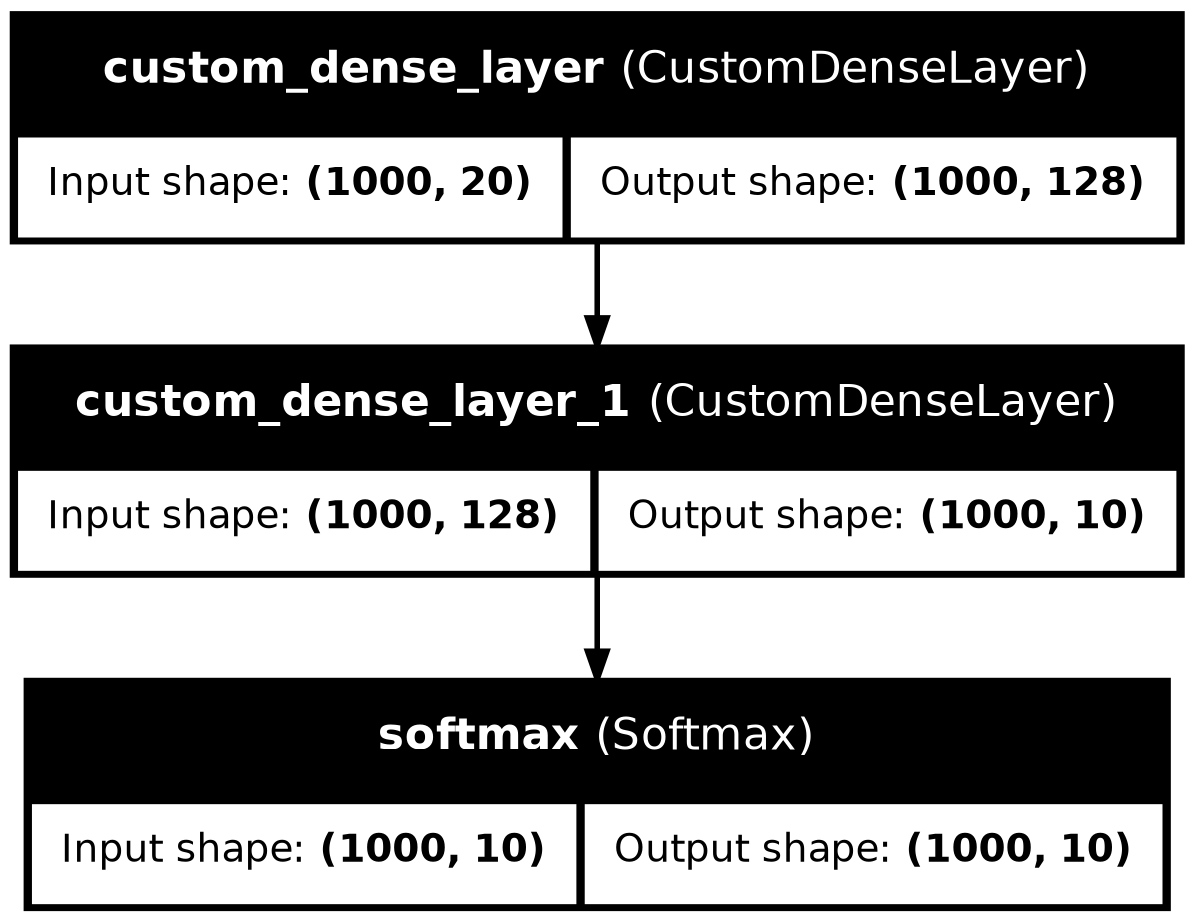

In [7]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [8]:
from tensorflow.keras.layers import Dropout

model = Sequential([CustomDenseLayer(128),
                    Dropout(0.5),       
                    CustomDenseLayer(10),
                    Softmax()])
model.build((1000, 20))
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.fit(x_train, y_train, epochs=10, batch_size=32) 
loss = model.evaluate(x_test, y_test) 
print(f'Test loss: {loss}') 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.3048
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3007 
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3003 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2973 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3014 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3006 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2980 
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2995 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3008 
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2967 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3044  
Test loss: 2.303605079650879
